## Optimization with Multi-Armed Bandits
### Sean O'Malley

Multi-armed bandit methods are useful when the testing of a hypothesis has associated costs. Bandit algorithms are built to move away from low performing scores towards high perfroming scores (given pre-determined metric of interest). 

The notion central to multi-armed bandits is the idea of exploration v. exploitation. Exploitation is essentially choosing the options that show the highest score given what we know thus far about an optimization problem. Exploration, on the other hand, is looking towards all other options available in order to determine performance of  all options.

The explore vs. exploit capabilities of multi-armed bandits make them most useful in hypothesis testing that has a large number of iterations. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

__Basic Greedy Epsilon:__ Summarize

Given the understanding of muli-armed bandits, there are still a variety of optimization options available for mulit-armed bandits. The best optimizing methodology is epsilon greedy, in which, every time the algorithm chooses an arm it considers exploring or exploiting. When exploring, epsilon greedy chooses an available arm at random and when exploiting it chooses the best performing arm thus far.

Visually, this is what epsilon greedy looks like:

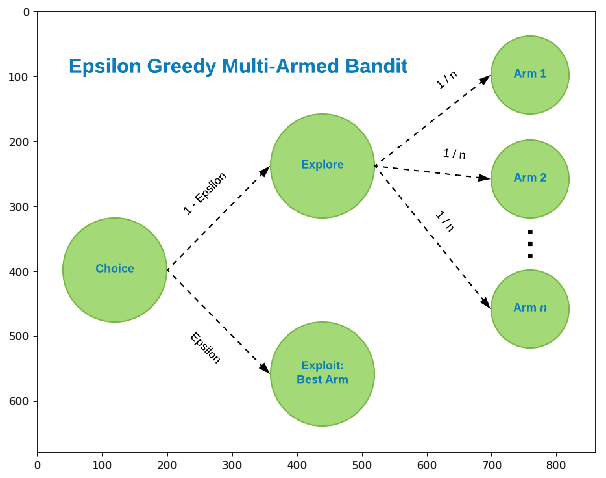

In [9]:
% matplotlib inline

fig = plt.figure(figsize=(9, 10), dpi= 80)
img = mpimg.imread('epsilon_greedy.png')
imgplot = plt.imshow(img)
plt.show()


To see how the diagram above mathematically backs out to in an example, lets assume that there are 3 arms and we have an epsilon of 0.7.


\begin{align}
Arms: n  & = \ 3 \ 
\end{align}

\begin{align}
Exploit: \epsilon\  & = \ 0.7 \ 
\end{align}

\begin{align}
Explore: \epsilon - 1\  & = \ 0.3 \ 
\end{align}


Therefore, the probability that we pull Arm 1 or Arm 3 of the explore arms given that Arm 2 is the top performer thus far:


\begin{align}
P(Arm 1) = 7/10 * 1/3 = 0.233
\end{align}

\begin{align}
P(Arm 3) = 7/10 * 1/3 = 0.233
\end{align}

\begin{align}
P(Arm 1 \cup\ Arm 3) = P(Arm 1) + P(Arm 3) = 0.47
\end{align}


Meaning that with an epsilon of 0.7, with 3 arms we have a probability of 0.47 of choosing Arm 1 or Arm 3 via exploring. Using probability combinations, the probability we will choose the best arm, Arm 2 is:

\begin{align}
P(ExploreArm2) = 7/10 * 1/3 = 0.233
\end{align}

\begin{align}
P(ExploitArm2) = 0.3
\end{align}

\begin{align}
P(Arm 2) = P(ExploreArm2) + P(ExploitArm2) = 0.53
\end{align}


__Basic Greedy Epsilon:__ Initialize

Below is the most basic form of the greedy epsilon algorithm. Using object oriented programming, we create the Bandit class, thencreate a function to then run the bandit through iterations who's optimizations across the three arms can be visualized. 

In [10]:
class GreedyEpsilon:
    
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0
        self.s2

    def pull(self): # meu
        return np.random.randn() + self.m

    def update(self, x): # x bar
        self.N += 1
        if (self.N > 1):
            self.s2 = ((self.N-2)/(self.N-1))*self.s2 + (x-self.mean)*(x-self.mean)/self.n
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [11]:
def run_experiment(m1, m2, m3, eps, N):
    
    # create bandits
    bandits = [GreedyEpsilon(m1), GreedyEpsilon(m2), GreedyEpsilon(m3)]
    
    # create empty list
    data = np.empty(N)
    
    # use greedy algorithm 
    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
            x = bandits[j].pull()
            bandits[j].update(x)

        # for the plot
        data[i] = x
        mean1[i] = bandits[0].mean
        mean2[i] = bandits[1].mean
        mean3[i] = bandits[2].mean
        var1[i] = bandits[0].s2
        var2[i] = bandits[1].s2
        var3[i] = bandits[2].s2
        
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    
    summary_stats = [cumulative_average, mean1, mean2, mean3,v ar1, var2, var3]

    for b in bandits:
        print(b.mean)

    return summary_stats

__Basic Greedy Epsilon:__ Test and Visualize

We can see in the experimentation outputs, given 3 arms and 100k iterations that no matter the exploration/exploitation proportion, the algorithm still arrives at the first arm producing the best payouts.

The delay to optimization is visible when setting the epsilon to higher values. However this increased variance could be useful in optimization problems with less consistent, more variant arms.

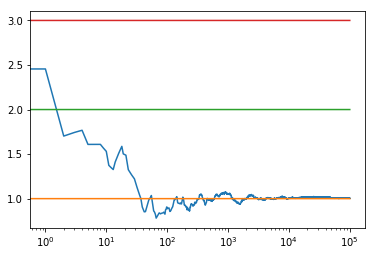

1.0062341060200248
0
0


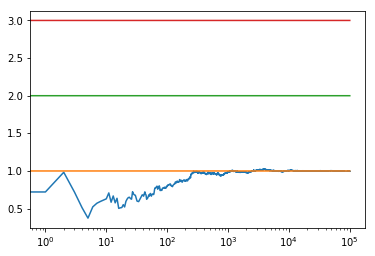

0.996360423841367
0
0


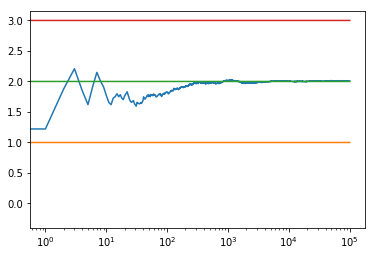

-0.2396753308540096
2.006580009768781
0


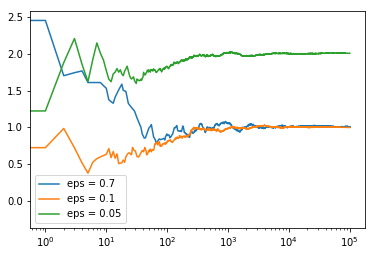

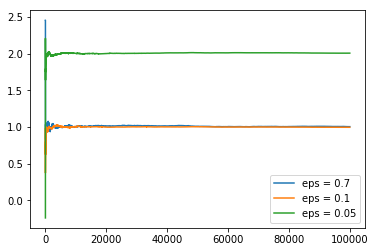

In [13]:
if __name__ == '__main__':
    
    c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
    c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
    c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
    c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)
    
    # log scale plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(c_05, label='eps = 0.05')
    plt.plot(c_01, label='eps = 0.01')
    plt.legend()
    plt.xscale('log')
    plt.show()

    # linear plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(c_05, label='eps = 0.05')
    plt.plot(c_01, label='eps = 0.01')
    plt.legend()
    plt.show()

__Basic Greedy Epsilon:__ Summarize

Knowing that in real world optimization problems, arm performance is much less consistent and the problem set, more complicated; The next logical thoughts are:

* How do we quantify how much we have wasted for the sake of exploration?
* How much extra are we willing to spend to explore options outside of what we know works? 
* How can we taper off epsilon through iterations as we gain confidence in arm performance?
* How does a multi armed bandit handle higher variance?

* with higher values of epsilon is that you are exploring more, but the problem is that you are exploring too much late
    * decaying epsilon
    * epsilong related to variance
    
information lives in self.N
* how can I calculate waste? 
* how many times to you play each of the the bandits?
